In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from newdust import *
from newdust.halos import *

from scipy.integrate import trapz

In [23]:
NE, NTH = 50, 200
EVALS   = np.logspace(-1, 1, NE)   # keV
THVALS  = np.logspace(-1, 4, NTH)  # arcsec
GPOP    = grainpop.make_MRN_drude(md=1.e-6)['RGD']

In [24]:
uni_halo = Halo(EVALS, THVALS, unit='kev')
scr_halo = Halo(EVALS, THVALS, unit='kev')

In [25]:
galhalo.uniformISM(uni_halo, GPOP)

In [26]:
GPOP.tau_sca

array([  5.67217238e-01,   4.70020465e-01,   3.89479062e-01,
         3.22739010e-01,   2.67435348e-01,   2.21608368e-01,
         1.83634173e-01,   1.52167130e-01,   1.26092193e-01,
         1.04485384e-01,   8.65810584e-02,   7.17447683e-02,
         5.94507837e-02,   4.92634623e-02,   4.08218120e-02,
         3.38266995e-02,   2.80302501e-02,   2.32270641e-02,
         1.92469388e-02,   1.59488368e-02,   1.32158883e-02,
         1.09512503e-02,   9.07467445e-03,   7.51966340e-03,
         6.23111473e-03,   5.16336819e-03,   4.27858773e-03,
         3.54542080e-03,   2.93788732e-03,   2.43445910e-03,
         2.01729694e-03,   1.67161853e-03,   1.38517461e-03,
         1.14781493e-03,   9.51128548e-04,   7.88145797e-04,
         6.53091319e-04,   5.41179401e-04,   4.48444400e-04,
         3.71600211e-04,   3.07923829e-04,   2.55158856e-04,
         2.11435542e-04,   1.75204533e-04,   1.45181970e-04,
         1.20303991e-04,   9.96890323e-05,   8.26065962e-05,
         6.84513589e-05,

[]

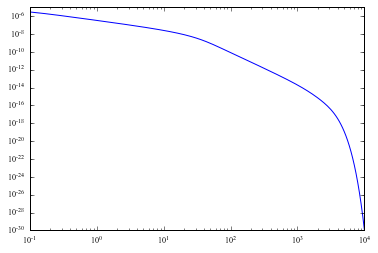

In [27]:
plt.plot(THVALS, uni_halo.norm_int[-1,:])
plt.loglog()

In [28]:
alph_grid = np.repeat(THVALS.reshape(1, NTH), NE, axis=0)
int_halo  = trapz(uni_halo.norm_int * 2.0 * np.pi * alph_grid, THVALS, axis=1)

In [29]:
uni_halo.taux

array([  5.67217238e-01,   4.70020465e-01,   3.89479062e-01,
         3.22739010e-01,   2.67435348e-01,   2.21608368e-01,
         1.83634173e-01,   1.52167130e-01,   1.26092193e-01,
         1.04485384e-01,   8.65810584e-02,   7.17447683e-02,
         5.94507837e-02,   4.92634623e-02,   4.08218120e-02,
         3.38266995e-02,   2.80302501e-02,   2.32270641e-02,
         1.92469388e-02,   1.59488368e-02,   1.32158883e-02,
         1.09512503e-02,   9.07467445e-03,   7.51966340e-03,
         6.23111473e-03,   5.16336819e-03,   4.27858773e-03,
         3.54542080e-03,   2.93788732e-03,   2.43445910e-03,
         2.01729694e-03,   1.67161853e-03,   1.38517461e-03,
         1.14781493e-03,   9.51128548e-04,   7.88145797e-04,
         6.53091319e-04,   5.41179401e-04,   4.48444400e-04,
         3.71600211e-04,   3.07923829e-04,   2.55158856e-04,
         2.11435542e-04,   1.75204533e-04,   1.45181970e-04,
         1.20303991e-04,   9.96890323e-05,   8.26065962e-05,
         6.84513589e-05,

[]

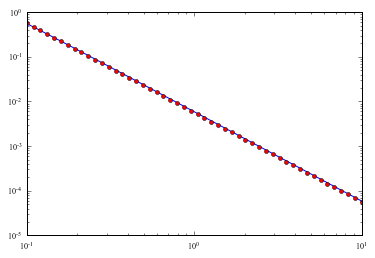

In [30]:
plt.plot(EVALS, int_halo)
plt.plot(EVALS, uni_halo.taux, 'ro')
plt.loglog()

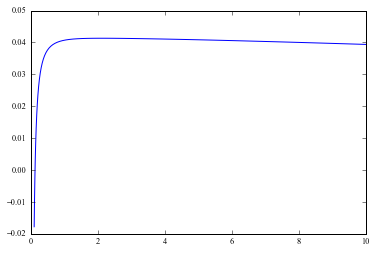

In [31]:
plt.plot(EVALS, int_halo/uni_halo.taux-1.0)

In [32]:
FABS = 1.0 * np.power(EVALS, -2.0) * np.exp(-0.1 * np.power(EVALS, -3.5))

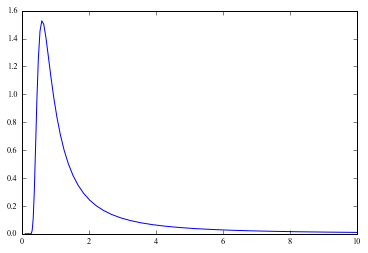

In [33]:
plt.plot(EVALS, FABS)

In [34]:
uni_halo.calculate_intensity(FABS)

[]

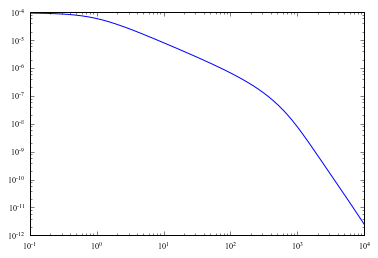

In [35]:
plt.plot(THVALS, uni_halo.intensity)
plt.loglog()

In [36]:
tot_halo = trapz(uni_halo.intensity * 2.0 * np.pi * THVALS, THVALS)

In [37]:
tot_halo

0.23266569089585762

In [39]:
np.sum(uni_halo.fhalo) / tot_halo

0.9534818964425209